<a href="https://colab.research.google.com/github/MiraiRT/NotePast/blob/master/da_oil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import datetime as dt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Pre dataset


Day
- **OIL-MAY20_rate_D1 2008 - 2020** (open high low close price data)
- brent-daily_csv 1987 - 2020
- gas_daily_csv 1997 - 2020

*Week*
- Weekly U.S. Ending Stocks of Crude Oil 1982 - 2020
- Weekly U.S. Exports of Crude Oil 1991 - 2020
- Weekly_U.S._Imports_of_Crude_Oil 1990 - 2020


*Month*
- Crude Oil Production Saudi Arabia Monthly 1997 - 2020
- Total OPEC Petroleum Supply Monthly 1994 - 2021
- Crude Oil Production OPEC Total Monthly 1994 -2021
- Total OPEC Petroleum Supply Monthly 1994 - 2021
- OPEC Total Crude Oil Production Capacity Monthly 1990 - 2021
- all-years-states 1960 - 2009
- U.S. Ending Stocks of Crude Oil and Petroleum Products 1956 - 2019
- U.S. Exports of Crude Oil 1920 - 2019
- U.S._Field_Production_of_Crude_Oil 1920 - 2019
- U.S._Field_Production_of_Natural_Gas_Liquids 1981 - 2019

In [0]:
#Read file

df = pd.read_csv('OIL-MAY20_rate_D1.csv')
df['time'] = pd.to_datetime(df['time'])
df = df.set_index('time')

In [4]:
df

,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,
2008-01-08,95.35,97.54,95.26,96.33,359,0,0
2008-01-09,96.24,97.97,95.42,95.67,454,0,0
2008-01-10,95.79,96.24,93.26,93.71,389,0,0
2008-01-11,93.55,94.65,92.31,92.86,400,0,0
2008-01-14,92.92,94.43,92.41,94.20,277,0,0
...,...,...,...,...,...,...,...
2020-04-06,25.88,28.21,25.28,26.28,34428,4,0
2020-04-07,26.35,27.21,23.53,24.24,27768,4,0
2020-04-08,24.15,26.39,23.73,26.10,34158,4,0


In [19]:
# Select Attriute
df = df.loc[:, ['open', 'high', 'low', 'close']]
df

,open,high,low,close
time,,,,
2008-01-08,95.35,97.54,95.26,96.33
2008-01-09,96.24,97.97,95.42,95.67
2008-01-10,95.79,96.24,93.26,93.71
2008-01-11,93.55,94.65,92.31,92.86
2008-01-14,92.92,94.43,92.41,94.20
...,...,...,...,...
2020-04-06,25.88,28.21,25.28,26.28
2020-04-07,26.35,27.21,23.53,24.24
2020-04-08,24.15,26.39,23.73,26.10


In [0]:
def readWeekData(path):
  wk = pd.read_csv(path, skiprows=[0,1,2,3])
  wk["Week of"] = pd.to_datetime(wk["Week of"])
  wk = wk.set_index('Week of')
  wk = wk.sort_index(ascending=True)
  wk = wk.loc['2009-1-1':'2019-12-31']
  wk = wk.rename_axis(index={'Week of': 'Date'})

  data = pd.DataFrame({'Date':pd.date_range(start='1/1/2009', end='12/31/2019')})
  # data['asd'] = [1,2,3,4,5,6,7,8]
  data = data.set_index('Date')
  data = data.join(wk, on='Date')
  data = data.fillna(method='bfill')

  return data

In [0]:
wk_end = readWeekData('Weekly_U.S._Ending_Stocks_of_Crude_Oil.csv')
wk_end

In [0]:
wk_exp = readWeekData('Weekly_U.S._Exports_of_Crude_Oil.csv')
wk_exp

In [0]:
wk_imp = readWeekData('Weekly_U.S._Imports_of_Crude_Oil.csv')
wk_imp

In [0]:
# Read brent-daily

brent = pd.read_csv('brent-daily_csv.csv')
brent['Date'] = pd.to_datetime(brent['Date'])
brent = brent.set_index('Date')
brent = brent.loc['1/1/2009':'12/31/2019']
brent = brent.rename(columns={'Price':'Price_brent'})
brent

In [0]:
# Read gas_daily

gas = pd.read_csv('gas_daily_csv.csv')
gas['Date'] = pd.to_datetime(gas['Date'])
gas = gas.set_index('Date')
gas = gas.loc['1/1/2009':'12/31/2019']
gas = gas.rename(columns={'Price':'Price_gas'})
gas

#Clean dataset

In [0]:
oil = df.copy()
# DAY_SHIFT = 5
# oil['open_shift'] = oil['open'].shift(DAY_SHIFT)
# oil['high_shift'] = oil['high'].shift(DAY_SHIFT)
# oil['low_shift'] = oil['low'].shift(DAY_SHIFT)
# oil['close_shift'] = oil['close'].shift(DAY_SHIFT)
# oil = oil.dropna()
oil = oil.rename_axis(index={'time': 'Date'})
oil = oil.loc['1/1/2009':'12/31/2019']
oil

In [0]:
# merge all table

new_data = oil.join([gas, brent, wk_end, wk_exp, wk_imp])
new_data = new_data.dropna()

In [59]:
new_data

,open,high,low,close,Price_gas,Price_brent,Weekly U.S. Ending Stocks of Crude Oil Thousand Barrels,Weekly U.S. Exports of Crude Oil Thousand Barrels per Day,Weekly U.S. Imports of Crude Oil Thousand Barrels per Day
Date,,,,,,,,,
2009-01-02,43.72,46.74,41.05,46.52,5.41,42.94,1009060.0,28.0,10485.0
2009-01-05,47.04,49.28,45.56,48.26,5.83,45.84,1010270.0,28.0,9729.0
2009-01-06,48.40,50.47,47.60,48.54,6.10,48.89,1010270.0,28.0,9729.0
2009-01-07,48.41,49.09,42.41,42.65,5.89,46.23,1010270.0,28.0,9729.0
2009-01-08,42.63,43.63,40.54,42.57,5.96,42.94,1010270.0,28.0,9729.0
...,...,...,...,...,...,...,...,...,...
2019-12-20,61.06,61.17,60.00,60.31,2.27,68.66,1076326.0,3397.0,6809.0
2019-12-23,60.33,60.74,60.08,60.61,2.17,67.49,1064863.0,4462.0,6352.0
2019-12-24,60.62,61.08,60.45,60.96,2.11,69.26,1064863.0,4462.0,6352.0


#Find correlation

                                                        open      high  \
open                                                1.000000  0.999281   
high                                                0.999281  1.000000   
low                                                 0.999065  0.998987   
close                                               0.998114  0.999135   
Price_gas                                           0.469684  0.472418   
Price_brent                                         0.974324  0.975073   
Weekly U.S. Ending Stocks of Crude Oil Thousand... -0.746917 -0.751661   
Weekly U.S. Exports of Crude Oil Thousand Barre... -0.415708 -0.419791   
Weekly U.S. Imports of Crude Oil Thousand Barre...  0.226049  0.232854   

                                                         low     close  \
open                                                0.999065  0.998114   
high                                                0.998987  0.999135   
low                                  

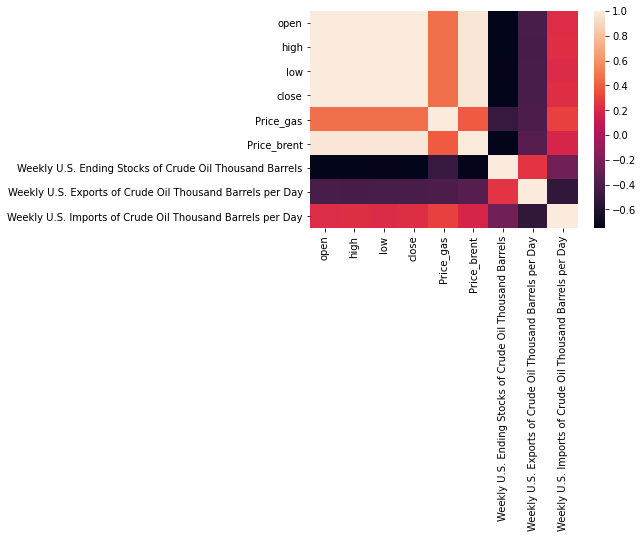

In [68]:
pd.set_option('display.max_columns', 500)
# data_corr = new_data.iloc[:, 3:].corr()
data_corr = new_data.corr()
print(data_corr)
sns.heatmap(data_corr)

In [66]:
# get shift

new_data_shift = oil.join([brent])
new_data_shift = new_data_shift.dropna()

for i in range(5,11):
  DAY_SHIFT = i
  new_data_shift['open_shift-'+str(i)] = new_data_shift['open'].shift(DAY_SHIFT)
  new_data_shift['high_shift-'+str(i)] = new_data_shift['high'].shift(DAY_SHIFT)
  new_data_shift['low_shift-'+str(i)] = new_data_shift['low'].shift(DAY_SHIFT)
  new_data_shift['close_shift-'+str(i)] = new_data_shift['close'].shift(DAY_SHIFT)
  new_data_shift['Price_brent_shift-'+str(i)] = new_data_shift['Price_brent'].shift(DAY_SHIFT)

new_data_shift = new_data_shift.dropna()
new_data_shift = new_data_shift.drop(columns=['open', 'high', 'low', 'Price_brent'])

new_data_shift

,close,open_shift-5,high_shift-5,low_shift-5,close_shift-5,Price_brent_shift-5,open_shift-6,high_shift-6,low_shift-6,close_shift-6,Price_brent_shift-6,open_shift-7,high_shift-7,low_shift-7,close_shift-7,Price_brent_shift-7,open_shift-8,high_shift-8,low_shift-8,close_shift-8,Price_brent_shift-8,open_shift-9,high_shift-9,low_shift-9,close_shift-9,Price_brent_shift-9,open_shift-10,high_shift-10,low_shift-10,close_shift-10,Price_brent_shift-10
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-01-16,35.88,42.45,42.70,39.39,40.36,42.34,42.63,43.63,40.54,42.57,42.94,48.41,49.09,42.41,42.65,46.23,48.40,50.47,47.60,48.54,48.89,47.04,49.28,45.56,48.26,45.84,43.72,46.74,41.05,46.52,42.94
2009-01-20,40.82,40.54,40.79,37.48,37.55,40.86,42.45,42.70,39.39,40.36,42.34,42.63,43.63,40.54,42.57,42.94,48.41,49.09,42.41,42.65,46.23,48.40,50.47,47.60,48.54,48.89,47.04,49.28,45.56,48.26,45.84
2009-01-21,44.29,37.49,39.50,36.10,38.79,43.05,40.54,40.79,37.48,37.55,40.86,42.45,42.70,39.39,40.36,42.34,42.63,43.63,40.54,42.57,42.94,48.41,49.09,42.41,42.65,46.23,48.40,50.47,47.60,48.54,48.89
2009-01-22,43.28,38.72,39.45,35.53,37.39,42.27,37.49,39.50,36.10,38.79,43.05,40.54,40.79,37.48,37.55,40.86,42.45,42.70,39.39,40.36,42.34,42.63,43.63,40.54,42.57,42.94,48.41,49.09,42.41,42.65,46.23
2009-01-23,45.98,37.34,37.99,33.21,35.21,42.32,38.72,39.45,35.53,37.39,42.27,37.49,39.50,36.10,38.79,43.05,40.54,40.79,37.48,37.55,40.86,42.45,42.70,39.39,40.36,42.34,42.63,43.63,40.54,42.57,42.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,60.96,60.20,60.94,59.95,60.44,68.99,59.85,60.31,59.73,60.20,68.04,59.32,60.45,59.25,59.77,67.44,58.86,59.69,58.73,59.19,66.67,59.05,59.19,58.10,58.78,65.37,58.89,59.49,58.51,59.06,66.57
2019-12-26,61.71,60.46,61.08,60.22,60.77,69.12,60.20,60.94,59.95,60.44,68.99,59.85,60.31,59.73,60.20,68.04,59.32,60.45,59.25,59.77,67.44,58.86,59.69,58.73,59.19,66.67,59.05,59.19,58.10,58.78,65.37
2019-12-27,61.67,60.79,61.37,60.67,61.06,69.70,60.46,61.08,60.22,60.77,69.12,60.20,60.94,59.95,60.44,68.99,59.85,60.31,59.73,60.20,68.04,59.32,60.45,59.25,59.77,67.44,58.86,59.69,58.73,59.19,66.67


                         close  open_shift-5  high_shift-5  low_shift-5  \
close                 1.000000      0.988713      0.989793     0.989563   
open_shift-5          0.988713      1.000000      0.999282     0.999074   
high_shift-5          0.989793      0.999282      1.000000     0.998998   
low_shift-5           0.989563      0.999074      0.998998     1.000000   
close_shift-5         0.990525      0.998126      0.999143     0.999238   
Price_brent_shift-5   0.967024      0.974277      0.975029     0.974213   
open_shift-6          0.986743      0.997985      0.997447     0.997017   
high_shift-6          0.987875      0.999016      0.998596     0.997835   
low_shift-6           0.987550      0.999102      0.998201     0.998399   
close_shift-6         0.988561      0.999866      0.999144     0.998961   
Price_brent_shift-6   0.965361      0.974629      0.974359     0.973315   
open_shift-7          0.984751      0.996097      0.995584     0.994993   
high_shift-7          0.9

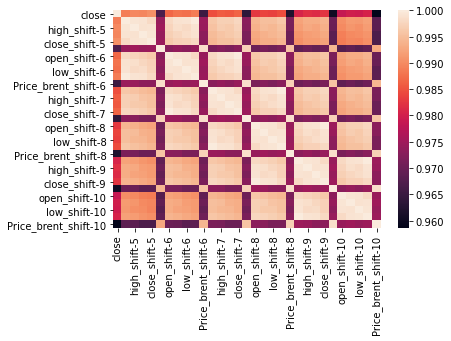

In [67]:
data_corr_sh = new_data_shift.corr()
# data_corr = new_data.corr()
print(data_corr_sh)
sns.heatmap(data_corr_sh)

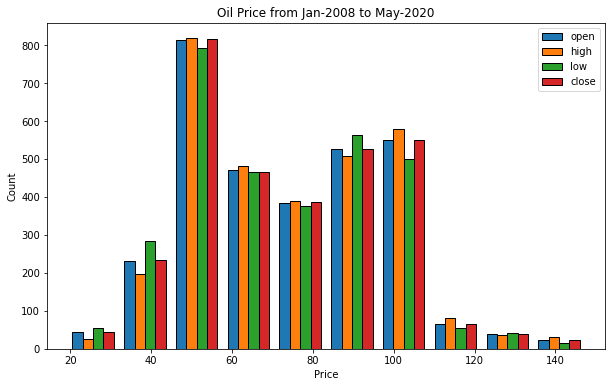

In [0]:
# Histogram

plt.figure(figsize=(10,6))
plt.hist([df['open'], df['high'] ,df['low'], df['close']], bins=10,label=['open', 'high', 'low', 'close'], edgecolor='black')
plt.legend()
plt.title('Oil Price from Jan-2008 to May-2020')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

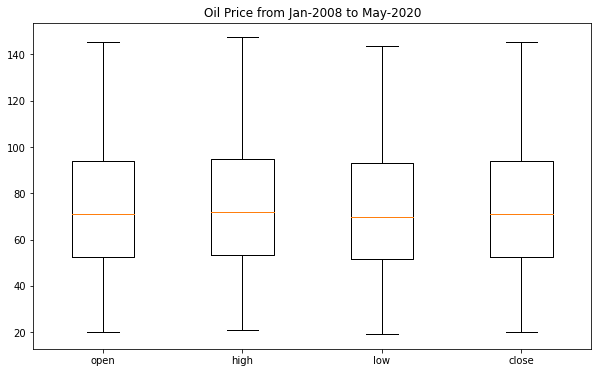

In [0]:
# Box plot

plt.figure(figsize=(10,6))
plt.boxplot([df['open'], df['high'] ,df['low'], df['close']], labels=['open', 'high', 'low', 'close'])
plt.title('Oil Price from Jan-2008 to May-2020')
plt.show()

In [72]:
DAY_SHIFT = 5
df_shift = brent.copy()
df_shift = df_shift.join([oil])
df_shift['open_shift'] = df_shift['open'].shift(DAY_SHIFT)
df_shift['high_shift'] = df_shift['high'].shift(DAY_SHIFT)
df_shift['low_shift'] = df_shift['low'].shift(DAY_SHIFT)
df_shift['close_shift'] = df_shift['close'].shift(DAY_SHIFT)
df_shift['brent_shift'] = df_shift['Price_brent'].shift(DAY_SHIFT)

df_shift = df_shift.dropna()
df_shift

,Price_brent,open,high,low,close,open_shift,high_shift,low_shift,close_shift,brent_shift
Date,,,,,,,,,,
2009-01-09,42.34,42.45,42.70,39.39,40.36,43.72,46.74,41.05,46.52,42.94
2009-01-12,40.86,40.54,40.79,37.48,37.55,47.04,49.28,45.56,48.26,45.84
2009-01-13,43.05,37.49,39.50,36.10,38.79,48.40,50.47,47.60,48.54,48.89
2009-01-14,42.27,38.72,39.45,35.53,37.39,48.41,49.09,42.41,42.65,46.23
2009-01-15,42.32,37.34,37.99,33.21,35.21,42.63,43.63,40.54,42.57,42.94
...,...,...,...,...,...,...,...,...,...,...
2019-12-24,69.26,60.62,61.08,60.45,60.96,60.20,60.94,59.95,60.44,68.99
2019-12-26,69.26,61.31,61.80,61.05,61.71,60.79,61.37,60.67,61.06,69.70
2019-12-27,68.91,61.70,61.94,61.22,61.67,61.06,61.17,60.00,60.31,68.66


                close  open_shift  high_shift  low_shift  close_shift  \
close        1.000000    0.988644    0.989687   0.989537     0.990458   
open_shift   0.988644    1.000000    0.999281   0.999065     0.998117   
high_shift   0.989687    0.999281    1.000000   0.998984     0.999136   
low_shift    0.989537    0.999065    0.998984   1.000000     0.999230   
close_shift  0.990458    0.998117    0.999136   0.999230     1.000000   
brent_shift  0.967165    0.974373    0.975110   0.974312     0.974720   

             brent_shift  
close           0.967165  
open_shift      0.974373  
high_shift      0.975110  
low_shift       0.974312  
close_shift     0.974720  
brent_shift     1.000000  


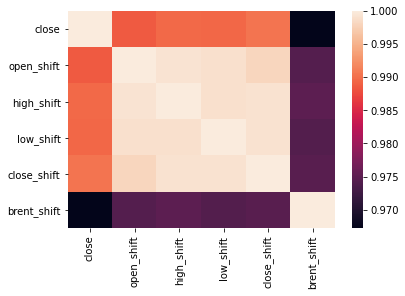

In [75]:
corr2 = df_shift.iloc[:, 4:].corr()
print(corr2)
sns.heatmap(corr2)

In [88]:
data = df_shift.iloc[:, 4:]
data

,close,open_shift,high_shift,low_shift,close_shift,brent_shift
Date,,,,,,
2009-01-09,40.36,43.72,46.74,41.05,46.52,42.94
2009-01-12,37.55,47.04,49.28,45.56,48.26,45.84
2009-01-13,38.79,48.40,50.47,47.60,48.54,48.89
2009-01-14,37.39,48.41,49.09,42.41,42.65,46.23
2009-01-15,35.21,42.63,43.63,40.54,42.57,42.94
...,...,...,...,...,...,...
2019-12-24,60.96,60.20,60.94,59.95,60.44,68.99
2019-12-26,61.71,60.79,61.37,60.67,61.06,69.70
2019-12-27,61.67,61.06,61.17,60.00,60.31,68.66


#Norm

In [0]:
data = data.to_numpy()

scaler = MinMaxScaler()

X = data[:, 1:]
Y = data[:, 0]

X = scaler.fit_transform(X)

#Split train test

#Model

#Validate
- accuracy